# DSCI 100 Group Project Report

### Introduction

Can we predict the win rate of a player given their various statistics? We aim to investigate the factors that influence the win rate in tennis games. We are interested in understanding the relationship between a player's stats and the likelihood of winning a game. By gaining insights into how these factors relate to the probability of winning, we can make more informed and predictive decisions regarding future tennis matches.

To conduct our research, we chose to use the `atp2017-2019.csv` data set provided on the group project proposal page on Canvas. This data set contains 6866 observations and 49 variables. Each observation represents a match played in 2017-2019 between top 500 ATP ranked players. The variables contain information both about the match and the individual player stats, with 11 being unique variables, and the rest being various player stats that are separate for the winner and the loser.

### Methods & Results

The following libraries are loaded to provide the functions that are used to operate on the data:

In [2]:
install.packages('GGally')

also installing the dependencies ‘labelled’, ‘broom.helpers’, ‘ggplot2’, ‘ggstats’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [3]:
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
options(repr.matrix.max.rows = 10)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.4     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

The data is read using `read_csv` and displayed below.

In [4]:
tennis_data <- read_csv("atp2017-2019.csv") |>
    select(-...1) |>
    mutate(surface = as_factor(surface))
tennis_data

New names:
• `` -> `...1`
Rows: 6866 Columns: 50
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (16): tourney_id, tourney_name, surface, tourney_level, winner_seed, win...
dbl (34): ...1, draw_size, tourney_date, match_num, winner_id, winner_ht, wi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


tourney_id                     tourney_name               surface
1    2019-M020                      Brisbane                   Hard   
2    2019-M020                      Brisbane                   Hard   
3    2019-M020                      Brisbane                   Hard   
4    2019-M020                      Brisbane                   Hard   
5    2019-M020                      Brisbane                   Hard   
⋮    ⋮                              ⋮                          ⋮      
6862 2017-0605                      Tour Finals                Hard   
6863 2017-M-DC-2017-WG-M-BEL-FRA-01 Davis Cup WG F: BEL vs FRA Hard   
6864 2017-M-DC-2017-WG-M-BEL-FRA-01 Davis Cup WG F: BEL vs FRA Hard   
6865 2017-M-DC-2017-WG-M-BEL-FRA-01 Davis Cup WG F: BEL vs FRA Hard   
6866 2017-M-DC-2017-WG-M-BEL-FRA-01 Davis Cup WG F: BEL vs FRA Hard   
     draw_size tourney_level tourney_date match_num winner_id winner_seed
1    32        A             20181231     300       105453    2          
2    32        A             20181231     299       106421    4          
3    32        A             20181231     298       105453    2          
4    32        A             20181231     297       104542    NA         
5    32        A             20181231     296       106421    4          
⋮    ⋮         ⋮             ⋮            ⋮         ⋮         ⋮          
6862 8         F             20171113     300       105777    6.0        
6863 4         D             20171124       1       105676    NA         
6864 4         D             20171124       2       104542    NA         
6865 4         D             20171124       4       105676    NA         
6866 4         D             20171124       5       106298    NA         
     winner_entry ⋯ l_1stIn l_1stWon l_2ndWon l_SvGms l_bpSaved l_bpFaced
1    NA           ⋯ 54      34       20       14      10        15       
2    NA           ⋯ 52      36        7       10      10        13       
3    NA           ⋯ 27      15        6        8       1         5       
4    PR           ⋯ 60      38        9       11       4         6       
5    NA           ⋯ 56      46       19       15       2         4       
⋮    ⋮            ⋱ ⋮       ⋮        ⋮        ⋮       ⋮         ⋮        
6862 NA           ⋯ 54      42       22       15      11        15       
6863 NA           ⋯ 53      33       21       14       6        11       
6864 NA           ⋯ 54      30       12       12       5        11       
6865 NA           ⋯ 54      44       13       14       7        10       
6866 NA           ⋯ 53      29       11       11       4        11       
     winner_rank winner_rank_points loser_rank loser_rank_points
1      9         3590                16        1977             
2     16         1977               239         200             
3      9         3590                40        1050             
4    239          200                31        1298             
5     16         1977                18        1855             
⋮    ⋮           ⋮                  ⋮          ⋮                
6862  6          3650                8         2975             
6863  7          3775               18         2235             
6864 15          2320               76          667             
6865  7          3775               15         2320             
6866 18          2235               76          667

The stats of the winners of each match are selected and renamed, then assigned to an object named *`tennis_winner`*. The number of wins is also obtained using `group_by()` and `summarize()` and assigned to *`tennis_wins`*.

In [5]:
tennis_winner <- tennis_data |>
    select(winner_name, winner_age, minutes:w_bpFaced) |>
    rename("name" = winner_name, "age" = winner_age, "ace" = w_ace, "df" = w_df, "sv_pts" = w_svpt, "first_sv_in" = w_1stIn, "first_sv_won" = w_1stWon,
           "second_sv_won" = w_2ndWon, "sv_gms" = w_SvGms, "bp_saved" = w_bpSaved, "bp_faced" = w_bpFaced)

tennis_wins <- tennis_winner |>
    group_by(name) |>
    summarize(win_count = n())

tennis_win_names <- tennis_winner |>
    pull(name)

The stats of the losers are also selected and renamed, but are then filtered to only contain those that have won at least a single match. The number of losses is obtained using the same operations.

In [6]:
tennis_loser <- tennis_data |>
    select(loser_name, loser_age, minutes, l_ace:l_bpFaced) |>
    rename("name" = loser_name, "age" = loser_age, "ace" = l_ace, "df" = l_df, "sv_pts" = l_svpt, "first_sv_in" = l_1stIn, "first_sv_won" = l_1stWon,
           "second_sv_won" = l_2ndWon, "sv_gms" = l_SvGms, "bp_saved" = l_bpSaved, "bp_faced" = l_bpFaced) |>
    filter(name %in% tennis_win_names)

tennis_losses <- tennis_loser |>
    group_by(name) |>
    summarize(loss_count = n())

tennis_loss_names <- tennis_loser |>
    pull(name)

`filter()` is used here again, this time to filter to only contain those that have lost at least a single match. The number of wins and losses are put into a single table using `bind_cols()`.  This creates a better representation of players, as those that have only won or only lost matches over two years are likely outliers who haven't played many games.

In [7]:
win_loss <- tennis_wins |>
    filter(name %in% tennis_loss_names) |>
    bind_cols(select(tennis_losses, loss_count))

Finally, all the data gathered above is put together and assigned to *`tennis_stats`*. This data frame contains all players with at least a single win and loss, including their average stats, number of games played, and numbers of wins and losses.

In [8]:
tennis_stats <- bind_rows(tennis_winner, tennis_loser) |>
    filter(name %in% tennis_loss_names) |>
    group_by(name) |>
    summarize(across(age:bp_faced, mean, na.rm = TRUE), games_played = n()) |>
    bind_cols(select(win_loss, win_count, loss_count))
tennis_stats

Warning message:
“There was 1 warning in `summarize()`.
ℹ In argument: `across(age:bp_faced, mean, na.rm = TRUE)`.
ℹ In group 1: `name = "Adam Pavlasek"`.
Caused by warning:
! The `...` argument of `across()` is deprecated as of dplyr 1.1.0.
Supply arguments directly to `.fns` through an anonymous function instead.

  # Previously
  across(a:b, mean, na.rm = TRUE)

  # Now
  across(a:b, \(x) mean(x, na.rm = TRUE))”


name                     age      minutes   ace      df       sv_pts   
1   Adam Pavlasek            22.94593  97.50000 6.750000 3.250000 82.75000 
2   Adrian Mannarino         29.97470 107.40764 4.848101 2.373418 78.07595 
3   Adrian Menendez Maceiras 32.46032 109.13333 3.800000 2.133333 78.53333 
4   Akira Santillan          20.06069  75.66667 6.166667 2.833333 65.33333 
5   Albert Ramos             30.31832 120.15686 3.823529 2.483660 81.73203 
⋮   ⋮                        ⋮        ⋮         ⋮        ⋮        ⋮        
249 Yuichi Sugita            29.39904 106.7143  3.728571 2.785714  80.24286
250 Ze Zhang                 27.82971  98.3000  5.300000 4.200000  76.40000
251 Zhe Li                   32.72553 122.6667  2.666667 1.166667  82.83333
252 Zhizhen Zhang            22.24120 114.6667  7.444444 1.444444  82.55556
253 Zsombor Piros            19.03810 187.6667  7.000000 2.666667 127.33333
    first_sv_in first_sv_won second_sv_won sv_gms   bp_saved bp_faced 
1   51.62500    35.00000     13.62500      12.87500 5.000000 9.000000 
2   48.01266    33.35443     15.55696      12.20886 4.025316 6.778481 
3   48.53333    32.06667     14.20000      11.60000 4.066667 7.600000 
4   35.00000    25.83333     16.33333      10.66667 2.000000 4.000000 
5   50.62745    34.56863     16.21569      12.48366 4.477124 7.320261 
⋮   ⋮           ⋮            ⋮             ⋮        ⋮        ⋮        
249 49.00000    33.64286     15.44286      12.27143 4.385714  7.400000
250 50.40000    35.70000     11.60000      11.70000 3.500000  6.200000
251 55.16667    33.50000     15.50000      12.66667 4.166667  8.500000
252 51.00000    36.77778     15.77778      12.55556 4.777778  6.888889
253 84.33333    55.33333     20.33333      19.66667 7.000000 12.666667
    games_played win_count loss_count
1     8           3         5        
2   158          81        77        
3    15           4        11        
4     6           2         4        
5   153          72        81        
⋮   ⋮            ⋮         ⋮         
249 70           29        41        
250 10            2         8        
251  7            1         6        
252 10            4         6        
253  3            1         2

To further improve applicability of the predictive model, only players who have played a minimum of five games are selected. `mutate()` is used to add a win_rate column, which will serve as the predicted variable for our analysis. Lastly, variables that are not wanted as predictors are removed using `select()`. This is the final format of the data.

In [10]:
tennis_wanted_stats <- tennis_stats |>
    filter(games_played >= 5) |>
    mutate(win_rate = win_count / games_played) |>
    select(-name, -games_played, -win_count, -loss_count)
tennis_wanted_stats

age      minutes   ace      df       sv_pts   first_sv_in first_sv_won
1   22.94593  97.50000 6.750000 3.250000 82.75000 51.62500    35.00000    
2   29.97470 107.40764 4.848101 2.373418 78.07595 48.01266    33.35443    
3   32.46032 109.13333 3.800000 2.133333 78.53333 48.53333    32.06667    
4   20.06069  75.66667 6.166667 2.833333 65.33333 35.00000    25.83333    
5   30.31832 120.15686 3.823529 2.483660 81.73203 50.62745    34.56863    
⋮   ⋮        ⋮         ⋮        ⋮        ⋮        ⋮           ⋮           
220 22.99085 109.7714  1.671429 1.628571 81.41429 53.75714    33.84286    
221 29.39904 106.7143  3.728571 2.785714 80.24286 49.00000    33.64286    
222 27.82971  98.3000  5.300000 4.200000 76.40000 50.40000    35.70000    
223 32.72553 122.6667  2.666667 1.166667 82.83333 55.16667    33.50000    
224 22.24120 114.6667  7.444444 1.444444 82.55556 51.00000    36.77778    
    second_sv_won sv_gms   bp_saved bp_faced win_rate 
1   13.62500      12.87500 5.000000 9.000000 0.3750000
2   15.55696      12.20886 4.025316 6.778481 0.5126582
3   14.20000      11.60000 4.066667 7.600000 0.2666667
4   16.33333      10.66667 2.000000 4.000000 0.3333333
5   16.21569      12.48366 4.477124 7.320261 0.4705882
⋮   ⋮             ⋮        ⋮        ⋮        ⋮        
220 14.65714      12.40000 5.142857 8.728571 0.4929577
221 15.44286      12.27143 4.385714 7.400000 0.4142857
222 11.60000      11.70000 3.500000 6.200000 0.2000000
223 15.50000      12.66667 4.166667 8.500000 0.1428571
224 15.77778      12.55556 4.777778 6.888889 0.4000000

The  data set is explored using the `ggpairs()` from the GGally package. It visualizes the relationships between the variables in the data set.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


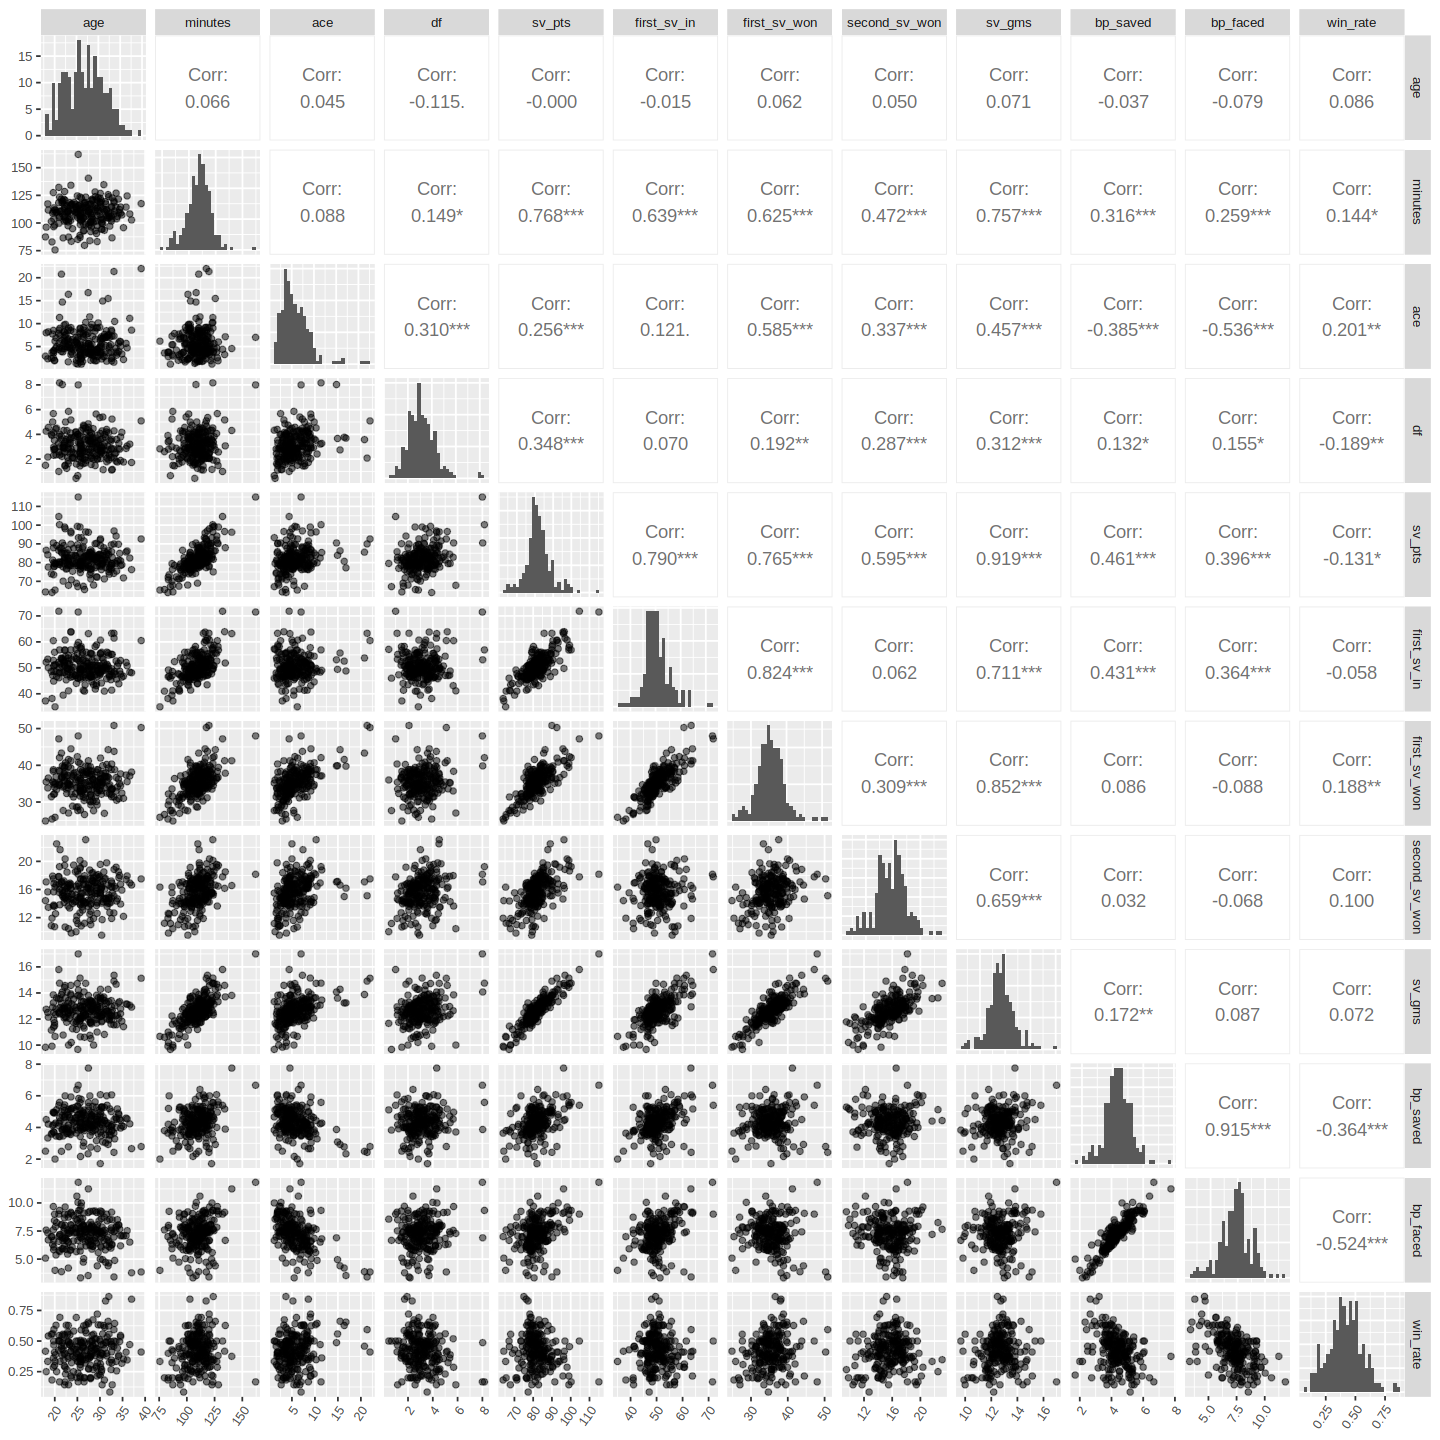

In [11]:
options(repr.plot.width = 12, repr.plot.height = 12)

tennis_pairplot <- tennis_wanted_stats |>
    ggpairs(
        lower = list(continuous = wrap('points', alpha = 0.5)),
        diag = list(continuous = "barDiag")
    ) +
    theme(text = element_text(size = 10)) +
    theme(axis.text.x = element_text(angle = 55, hjust = 1))

tennis_pairplot

*ANALYSIS HAPPENS BELOW*

Prior to the analysis, the seed is set for a consistent, reproducible split. The data is split into a training set and a testing set. 75% of the data set is used in the training set, and the variable we want to predict is set as the `strata` argument.

In [10]:
set.seed(1000)

tennis_split <- initial_split(tennis_wanted_stats, prop = 0.75, strata = win_rate)
tennis_training <- training(tennis_split)
tennis_testing <- testing(tennis_split)

*Fit created on training data*

In [9]:
lm_spec <- linear_reg() |>
    set_engine("lm") |>
    set_mode("regression")

tennis_recipe <- recipe(win_rate ~ age + minutes + df + sv_pts + first_sv_in + first_sv_won + second_sv_won + sv_gms + bp_saved + bp_faced,
                        data = tennis_training)

tennis_fit <- workflow() |>
    add_model(lm_spec) |>
    add_recipe(tennis_recipe) |>
    fit(data = tennis_training)

tennis_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
  (Intercept)            age        minutes             df         sv_pts  
     0.668481      -0.001470       0.005273       0.005404      -0.020724  
  first_sv_in   first_sv_won  second_sv_won         sv_gms       bp_saved  
     0.022035      -0.038175      -0.002269       0.130777       0.207770  
     bp_faced  
    -0.191079  


### Discussion

### References

Sackmann, J. (2023). tennis_atp. GitHub. https://github.com/JeffSackmann/tennis_atp